

# Project: Investigate a Dataset( The Movie Database Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction

The data set is taken from The Movie Database (TMDb) from 1960 to 2013, and contains basic movie information and movie evaluation information. The basic information of a movie includes cast, directors, genres, and movie tagline. Evaluation information such as revenue, voting,popularity, etc. can be used to measure the success of the movie.

This analysis is based on python, analyzes and explores the data set, uses pandas, numpy, matplotlib and other packages to organize and explore the data, and find out the factors that affect the success of the movie.

The project will analysis based from the following questions:

What are the Top 10 popular movies in the movie market?
With the years changes, What is the impact of movie net profit?
The relationship between: movie runtime vs revenue and vote_average
Who are the top 10 most productive directors?

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
#import dataframe
movie_data=pd.read_csv('tmdb-movies.csv')
movie_data.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#Check the size of dataframe, numbers of rows and columns
movie_data.shape

(10866, 21)

In [4]:
#View the descriptive statistics of the data set
movie_data.describe()

#missing value (0) exist at min,  in budget, revenue and runtime etc. 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#view dataframe overall information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#Check if any null value in each column
movie_data.isnull().any()    #NULL/NaN value exists

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [7]:
#Check if any null value exists
movie_data.duplicated().sum() #one duplicated row exists

1

In [8]:
#Check if missing value (0) exists
movie_data.eq(0).any().any() # 0 value exists

True

### Data Cleaning :  Remove and clean invalid value

In [9]:
#Use .drop to remove the columns that not need for further analysis.
movie_data.drop(columns=['id','imdb_id','homepage','tagline','overview','release_date'], axis=1, inplace=True)
movie_data.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [10]:
#Use "null_value" to replace the value of 0, to avoid data calculation deviation. 
movie_data.replace(0, np.nan,  inplace=True)

#Then check the sum of null
movie_data.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

From this cell shows, 'budget' contains 5696 null values, 'revenue' contains 6016 null values, etc.  
If deleting all the null values in budget and revenue will reduce the amount of data drastically, which will have a certain impact on the final analysis results.  
Therefore, I choose to delete null values base from'runtime', because there are 31 units with runtime being 0, which are relatively small amount compare to other columns.


In [11]:
#Use to remove rows with Null value in column'runtime'
col=['runtime']

movie_data.dropna(subset=col, inplace=True)

In [12]:
#Use .drop_duplicates to remove duplicate value
movie_data.drop_duplicates(inplace=True)

In [13]:
#Check the overall information after Data Cleaning
movie_data.shape

(10834, 15)

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1: What are the Top 10 popular movies in the movie market?¶

In [14]:
#Sort the movies by popularity descending rank 
#Then get the top 10 rank popular movies
#I also included the genres column in the diagram, because I want to see the genre categories for top 10 movies. 
top_movies = movie_data[['original_title','popularity','genres']].sort_values(by='popularity', ascending=False)[:10].sort_values(by='popularity', ascending=True)
top_movies

,original_title,popularity,genres
633,The Hunger Games: Mockingjay - Part 1,10.739009,Science Fiction|Adventure|Thriller
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy
632,John Wick,11.422751,Action|Thriller
1329,Star Wars,12.037933,Adventure|Action|Science Fiction
631,Captain America: The Winter Soldier,12.971027,Action|Adventure|Science Fiction
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller
630,Guardians of the Galaxy,14.311205,Action|Science Fiction|Adventure
629,Interstellar,24.949134,Adventure|Drama|Science Fiction
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller


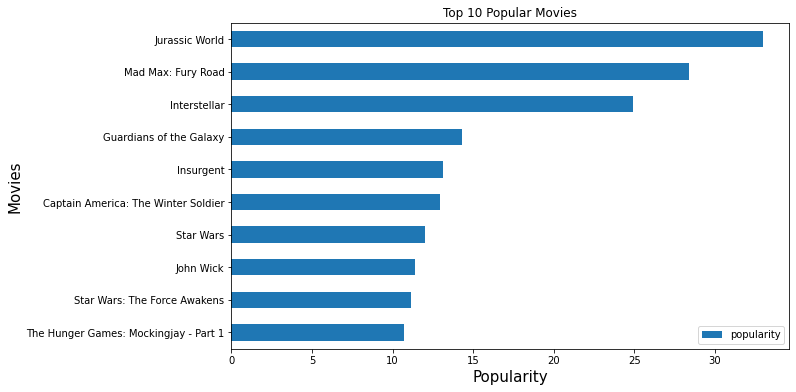

In [15]:
#Generate a barh chart: 'orginal_title' vs 'Popularity'
#Set the size of the chart, label the title and axis. 
top_movies.set_index('original_title').plot(kind='barh',figsize=(10,6))
plt.title('Top 10 Popular Movies')
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Movies',fontsize=15)
plt.show()

Question 1 conclusion:

From the visual chart shows that Movie "Jurassic World Part1" achieved the most popular movie award.
Also shows the top 10 popular movies in the movie market. 

The 'movie title' is independent variable, and 'popularity' is dependent variable. 

In the diagram also shows that top 10 movies are mostly in genres: Adventure and Science Fiction. 

------------

### Research Question 2 : With the years changes, What is the impact of movie net profit?

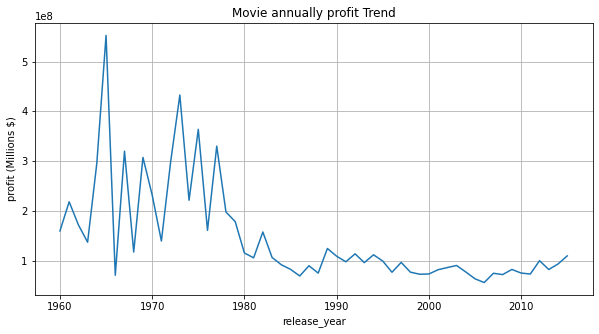

In [16]:
#Question 2 part 1: Movie annually profit Trend

#Created a new column as profit, calculate the movie profit between revenue and budget.
movie_data['profit']= movie_data['revenue_adj']-movie_data['budget_adj']

#Groupby movie release year, then calculate the average annual profit for each year. 
profits=movie_data.groupby('release_year')['profit'].mean()

#Since this plot will be used again, so define as a function
#set the figsize, and line chart
#set a as variables, b as y-axis label, c as title.
def trend_plot(a,b,c):
    a.plot(kind='line', ylabel=b , title=c, figsize=(10,5))
    plt.grid(True)
    plt.show()
trend_plot(profits, 'profit (Millions $)', 'Movie annually profit Trend')


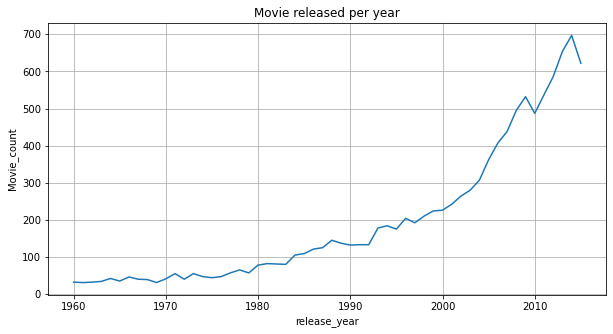

In [17]:
#Question 2 part 2: Movie release Trend

#Groupby movie release_year, and count movies released per year.
movie_count=movie_data.groupby('release_year')['original_title'].count()

#plug the variables into defined function
trend_plot(movie_count, 'Movie_count', 'Movie released per year')


Question 2 Conclusion:

In the 1st visual chart shows, the movie profits fluctuated greatly between 1960s and 1980s, and becoming steady over time. After 1980s, the average net profits are in a downward trend. 

In the 2nd visual chart shows, the movie productions are gradually increase every year. There were less than 100 annually productions before 1980s, and now almost 700 annually productions after 2010s.

By analyzing two charts, can conclude that time changes have major impacts on movie market. With the gradual increase of movie productions every year, the audience had more options, which directly decrease the average net profit for each movie.

The 'release year' is independent variable,   'revenue_adj' budget_adj' and 'Movie count' are dependent variables. 

------------------

Research Question 3: The relationship between: movie runtime vs revenue and vote_average

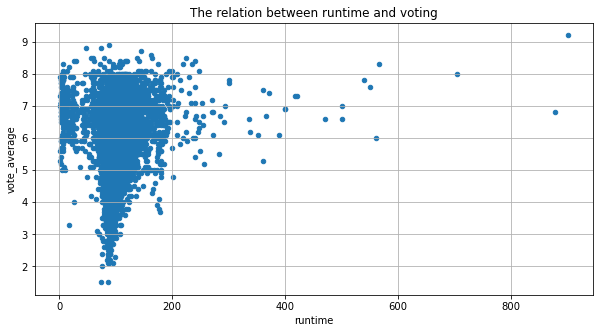

In [18]:
#Question 3 part1: The relation between runtime and voting

#Generate a scatter chart， to observe the highly clustered
#Since this plot will be used again, so define as a function
#Set the x axis variables as runtime, y axis variable as vote_average
#set the figsize,  c as title.
def scatter_plot(a,b,c):
    movie_data.plot(kind='scatter',x=a ,y=b,title=c, figsize=(10,5))
    plt.grid(True)
    plt.show()
scatter_plot('runtime', 'vote_average', 'The relation between runtime and voting')


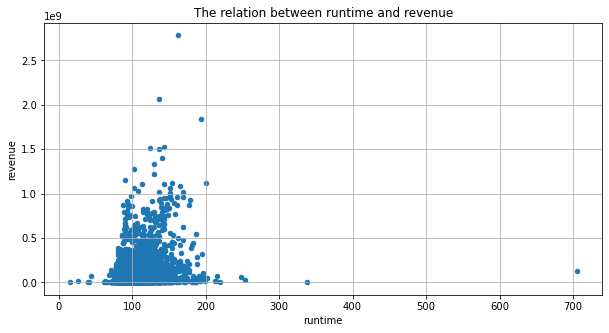

In [19]:
#Question 3 part 2: The relation between runtime and revenue

#Set the x axis variable as runtime, y axis variable as revenue
#plug the variables into defined function
scatter_plot('runtime', 'revenue', 'The relation between runtime and revenue')


Question 3 conclusion:  
Both charts use scatter chart，whic is easier to observe the highly clustered area.
As the chart shows, if a movie wants to obtain a higher revenue and a good reputaion, the duration of the movie should be kept within 90 to 150 minutes.

The 'movie runtime' is independent variable, 'vote_average' and 'revenue'are dependent variables.

------------

Question 4: Who are the top 10 most productive directors?

In [20]:
Question 4: Who are the top 10 most productive directors

SyntaxError: invalid syntax (<ipython-input-20-0915f0697a43>, line 1)

In [ ]:
#Count the movie production for each director, and sort the top 10
movie_data['director'].value_counts()[:10].plot(kind='bar')

From this diagram shows, director Woody Allen won the most productive award. And all the top 10 directors have more than 20 movies produced.

This is a single variable exploration, using count of 'director' 

<a id='conclusions'></a>
## Conclusions
In the analysis of TOP 10 movies, shows that 9 out of top 10 movies belong to the Adventure and Science Fiction genres, indicates that most audiences are intereted in these two genres.

In the research 2 analysis, shows that the movie production industry is very popular over time. As movie production increase, the movie genres are also increase. Audiences can freely choose their favorite topics, cast and director, which directly affects the profitability of some movies. Also, film investment is now more expensive than the pass, involving high-salary celebrity and high technology etc.

In the research 3, shows that movie runtime are directly related to the revenue and voting. It can be found from the two charts, higher revernue and better rating movies are concentrated between runtime 90-150mins. You can also found that a few movies' runtime are as long as 300-500 minutes. 

Limitation:

1.The data provided by the dataset are sufficient to answer my questions. However there are still many missing values(0) exists in the dataset(suchas: revenue, budget,etc).Although I have replace them as NULL, it may still affect the accuracy of the analysis.

2.The dataset does not include the origin country for each movie. It is a key factor to analyze the movie development trend in each country.

3.The money(revenue, budget, etc) are in a big number, should be summarized with a unit(such as Million). 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])